In [24]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools 
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
train_dir = 'C://Users//Deep.ai//Downloads//dog-breed-identification//train'
test_dir ='C://Users//Deep.ai//Downloads//dog-breed-identification//test'

Wall time: 0 ns


In [3]:
import pandas as pd
def append_ext(fn):
    return fn+".jpg"
traindf = pd.read_csv('C://Users//Deep.ai//Downloads//dog-breed-identification//labels.csv',dtype=str)
testdf = pd.read_csv('C://Users//Deep.ai//Downloads//dog-breed-identification//sample_submission.csv',dtype=str)
traindf["id"] = traindf["id"].apply(append_ext)
testdf["id"] = testdf["id"].apply(append_ext)

In [4]:
traindf.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [5]:
testdf.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
1,00102ee9d8eb90812350685311fe5890.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
4,001a5f3114548acdefa3d4da05474c2e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333


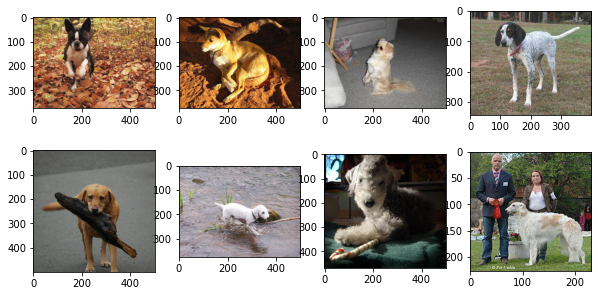

In [6]:
import os
src_path = "C://Users//Deep.ai//Downloads//dog-breed-identification//train"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:8])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [7]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from IPython.display import clear_output
def get_threshold(image) :
    a,b,x=plt.hist(image.flatten())
    arg=np.argmax(a)
    threshold=[b[arg],b[arg+1]]
    plt.clf()
    return threshold
def make_mask(path,color='blue',print_plot=False):
    image=Image.open(path)
    image=image.resize((150,150))
    image=image.convert('L')
    image=np.array(image)
    threshold=get_threshold(image)
    if color=='blue' :
        n=[0,0,255]
    masked_image=[]
    for i in image.flatten() :
        if i >= threshold[0] and i<=threshold[1] :
            masked_image.append(255)
        else:
            masked_image.append(0)
    masked_image=np.array(masked_image)
    masked_image=masked_image.reshape(image.shape)
    if print_plot==True :
        plt.imshow(masked_image)
    return masked_image

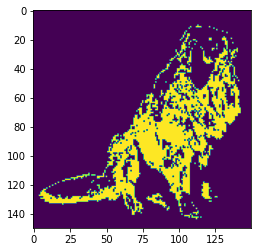

In [8]:
arr=make_mask('C://Users//Deep.ai//Downloads//dog-breed-identification//train//0b97116ed04c8f0f7eb4a2b4b2620476.jpg',print_plot=True)

In [9]:
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  #rotation_range = 20,
                                  #brightness_range=[0.2,1.0],
                                  #width_shift_range = 0.2,
                                  #height_shift_range = 0.2,
                                  #shear_range = 0.2,
                                  #zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 2% 
                                  validation_split=0.02 
                                  )
BATCH_SIZE = 32
image_size=(299,299)
train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb" 
)

Found 10018 validated image filenames belonging to 120 classes.


<class 'numpy.ndarray'>
(32, 299, 299, 3)
(32, 120)


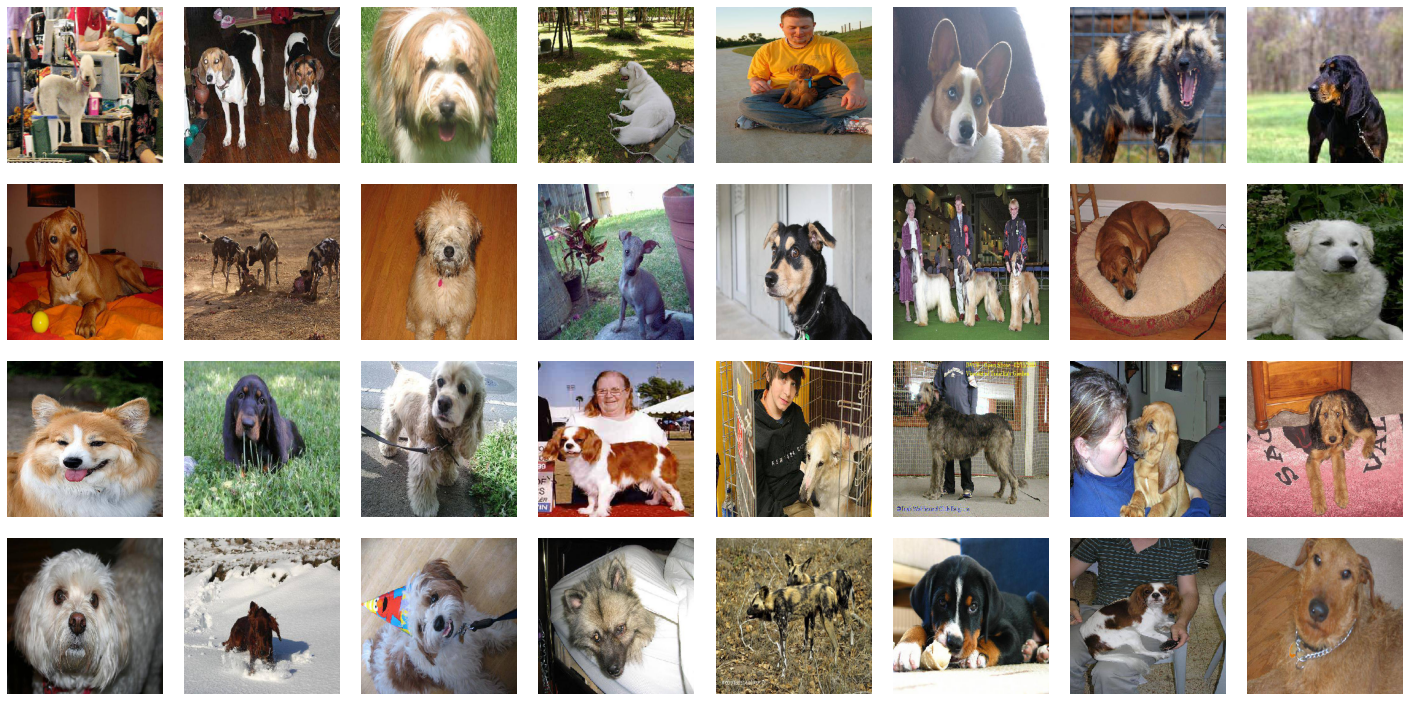

In [10]:
x,y = next(train_generator)
print(type(x))
print(x.shape)
print(y.shape)
def show_grid(image_list,nrows,ncols,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
show_grid(x,4,8,figsize=(25,25))

In [11]:
valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb")

Found 204 validated image filenames belonging to 120 classes.


In [12]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=42,
shuffle=False,
class_mode=None,
target_size=image_size,
color_mode="rgb")

Found 10357 validated image filenames.


In [13]:
shape=[299,299,3]
pretrained_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
pretrained_model.trainable = False
    
model = tf.keras.Sequential([ 
        pretrained_model,   
        tf.keras.layers.GlobalAveragePooling2D(),
        #tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
    ])

In [14]:
opt=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               245880    
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               245880    
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [15]:

early = tf.keras.callbacks.EarlyStopping( patience=2,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [16]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    callbacks=[early],)

Epoch 1/25
313/313 [==============================] - 688s 2s/step - loss: 4.4612 - accuracy: 0.1371 - val_loss: 3.1634 - val_accuracy: 0.6198
Epoch 2/25
313/313 [==============================] - 663s 2s/step - loss: 2.7170 - accuracy: 0.7278 - val_loss: 1.9227 - val_accuracy: 0.7708
Epoch 3/25
313/313 [==============================] - 674s 2s/step - loss: 1.6201 - accuracy: 0.8382 - val_loss: 1.2788 - val_accuracy: 0.8542
Epoch 4/25
313/313 [==============================] - 910s 3s/step - loss: 1.0706 - accuracy: 0.8743 - val_loss: 0.9429 - val_accuracy: 0.8646
Epoch 5/25
313/313 [==============================] - 1049s 3s/step - loss: 0.8133 - accuracy: 0.8875 - val_loss: 0.7447 - val_accuracy: 0.8802
Epoch 6/25
313/313 [==============================] - 996s 3s/step - loss: 0.6691 - accuracy: 0.8894 - val_loss: 0.6586 - val_accuracy: 0.8854
Epoch 7/25
313/313 [==============================] - 649s 2s/step - loss: 0.5832 - accuracy: 0.8949 - val_loss: 0.5755 - val_accuracy: 0.880

In [23]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

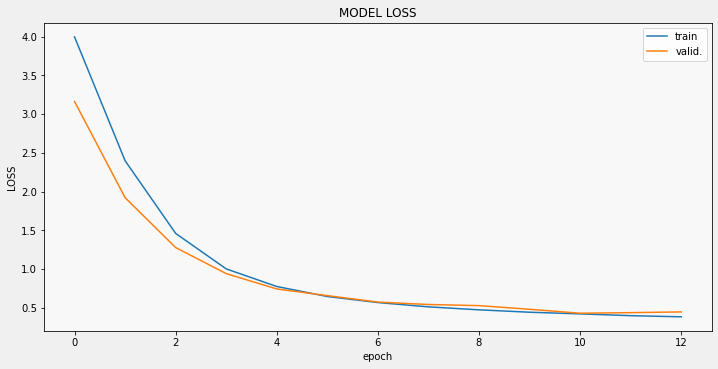

In [18]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)

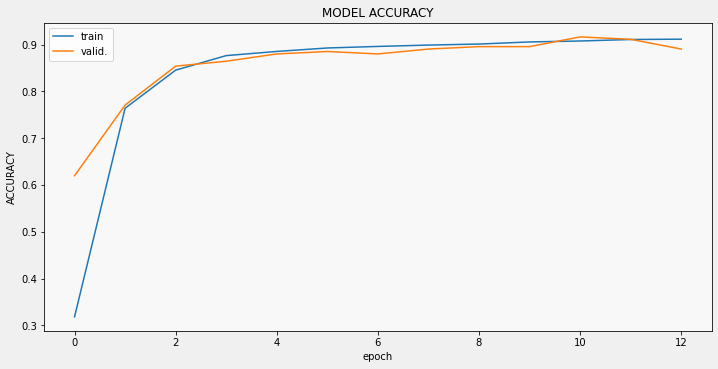

In [19]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    211,
)

In [20]:
score = model.evaluate(valid_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

7/7 [==============================] - 23s 3s/step - loss: 0.4697 - accuracy: 0.8922
Accuracy: 89.22%
Loss:  0.4697496294975281


In [21]:
import numpy as np
from sklearn.metrics import f1_score
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
f_score = f1_score(valid_generator.classes,y_pred,average='macro')
print('F1 score:',f_score)
pred=model.predict(test_generator)
df_submission = pd.read_csv('C://Users//Deep.ai//Downloads//dog-breed-identification//sample_submission.csv')
df_submission.head()



F1 score: 0.009574468085106383


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [22]:
breeds=['id','beagle','chihuahua','doberman','french_bulldog', 'golden_retriever', 'malamute','pug','saint_bernard','scottish_deerhound','tibetan_mastiff']

In [24]:
selected_breeds = df_submission.loc[:,breeds]
print('Breeds and prediction score')
selected_breeds.head()
final_sub = df_submission.set_index('id')
final_sub.to_csv('C://Users//Deep.ai//Downloads//dog-breed-identification//Submission.csv')

Breeds and prediction score
